<a href="https://colab.research.google.com/github/JHBaek0306/BigData/blob/main/Classification_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	training's binary_logloss: 0.625671	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248	valid_1's binary_logloss: 0.628248
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.588173	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	training's binary_loglos

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall ,f1, roc_auc))

In [ ]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도:0.9561, 정밀도:0.9615, 재현율:0.9740, F1:0.9677, AUC:0.9888


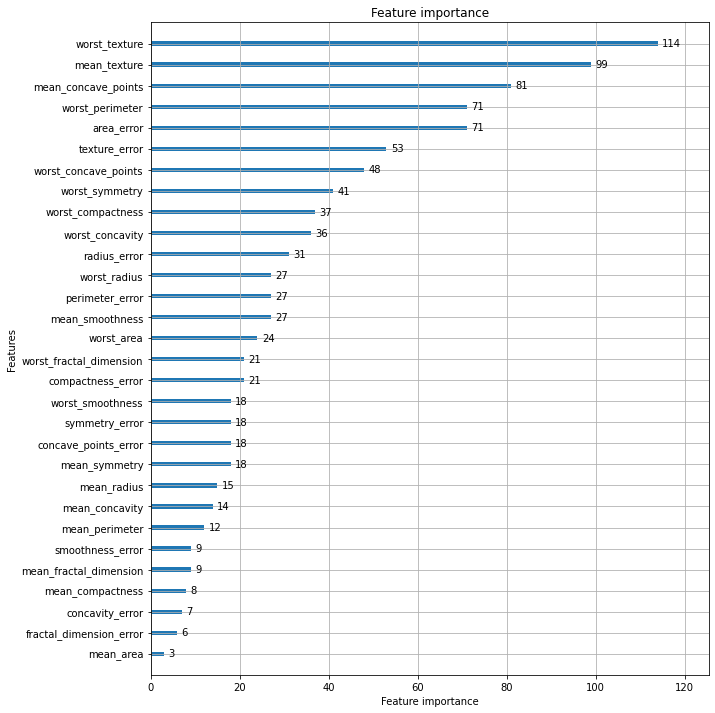

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

베이지안 최적화

In [ ]:
params = {
    'max_depth' : [10, 20 ,30, 40 ,50],
    'num_leaves' : [35, 45, 55, 65],
    'colsample_bytree' : [0.5, 0.6, 0.7, 0.8, 0.9],
    'subsample' : [0.5, 0.6, 0.7, 0.8, 0.9],
    'min_child_weight' : [10, 20, 30, 40],
    'reg_alpha' : [0.01, 0.05, 0.1]
}

In [ ]:
pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from hyperopt import hp

search_space = {'x':hp.quniform('x', -10, 10, 1), 'y':hp.quniform('y', -15, 15, 1)}

In [ ]:
from hyperopt import STATUS_OK

def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y

    return retval

In [ ]:
from numpy.random import default_rng

In [ ]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()

best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5, trials=trial_val,  rstate=np.random.seed(0))
print('best:', best_01)

100%|██████████| 5/5 [00:00<00:00, 475.28it/s, best loss: -171.0]
best: {'x': 7.0, 'y': 11.0}


In [ ]:
trial_val = Trials()

best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20, trials=trial_val,  rstate=np.random.seed(0))
print('best:', best_02)

100%|██████████| 20/20 [00:00<00:00, 503.02it/s, best loss: -271.0]
best: {'x': -3.0, 'y': 14.0}


In [ ]:
print(trial_val.results)

[{'loss': 309.0, 'status': 'ok'}, {'loss': -200.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': -76.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -271.0, 'status': 'ok'}, {'loss': -179.0, 'status': 'ok'}, {'loss': 9.0, 'status': 'ok'}, {'loss': -196.0, 'status': 'ok'}, {'loss': -55.0, 'status': 'ok'}, {'loss': 196.0, 'status': 'ok'}, {'loss': 161.0, 'status': 'ok'}, {'loss': 309.0, 'status': 'ok'}, {'loss': 196.0, 'status': 'ok'}, {'loss': 181.0, 'status': 'ok'}, {'loss': -119.0, 'status': 'ok'}, {'loss': 216.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -159.0, 'status': 'ok'}, {'loss': -144.0, 'status': 'ok'}]


In [ ]:
print(trial_val.vals)

{'x': [-3.0, -0.0, 2.0, -2.0, 9.0, -3.0, -1.0, 7.0, -2.0, -5.0, -4.0, 9.0, -3.0, -6.0, -9.0, -9.0, -4.0, -6.0, -9.0, 4.0], 'y': [-15.0, 10.0, 3.0, 4.0, 4.0, 14.0, 9.0, 2.0, 10.0, 4.0, -9.0, -4.0, -15.0, -8.0, -5.0, 10.0, -10.0, -1.0, 12.0, 8.0]}


In [ ]:
import pandas as pd

losses = [loss_dict['loss'] for loss_dict in trial_val.results]

result_df = pd.DataFrame({'x':trial_val.vals['x'], 'y':trial_val.vals['y'], 'losses':losses})
result_df

,x,y,losses
0,-3.0,-15.0,309.0
1,-0.0,10.0,-200.0
2,2.0,3.0,-56.0
3,-2.0,4.0,-76.0
4,9.0,4.0,1.0
5,-3.0,14.0,-271.0
6,-1.0,9.0,-179.0
7,7.0,2.0,9.0
8,-2.0,10.0,-196.0
9,-5.0,4.0,-55.0


실습 - 캐글 산탄데르 고객 만족 예측측

XGBoost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv('/content/drive/MyDrive/머신러닝/Kaggle_data/train_santander.csv', encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(5)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [ ]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

In [ ]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습세트 Shape {0}, 테스트세트 Shape {1}'.format(train_cnt, test_cnt))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습세트 Shape 60816, 테스트세트 Shape 15204
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.799587	validation_1-auc:0.800989
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.800531	validation_1-auc:0.802251
[2]	validation_0-auc:0.803785	validation_1-auc:0.806727
[3]	validation_0-auc:0.806161	validation_1-auc:0.810388
[4]	validation_0-auc:0.807365	validation_1-auc:0.811955
[5]	validation_0-auc:0.813828	validation_1-auc:0.818176
[6]	validation_0-auc:0.813906	validation_1-auc:0.81871
[7]	validation_0-auc:0.812114	validation_1-auc:0.813974
[8]	validation_0-auc:0.813004	validation_1-auc:0.814535
[9]	validation_0-auc:0.813211	validation_1-auc:0.81409
[10]	validation_0-auc:0.814129	validation_1-auc:0.815324
[11]	validation_0-auc:0.813789	validation_1-auc:0.815378
[12]	validation_0-auc:0.813817	validation_1-auc:0.815037
[13]	validation_0-auc:0.814576	validation_1-auc:0.816116
[14]	validation_0-auc:0.814895	validation_1-auc:0.816116

In [ ]:
from hyperopt import hp

xgb_search_space = {'max_depth':hp.quniform('max_depth', 5, 15, 1),
                    'min_child_weight':hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree':hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate':hp.uniform('learning_rate', 0.01, 0.2)}

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']), min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'], learning_rate=search_space['learning_rate'])
    roc_auc_list = []

    kf = KFold(n_splits=3)
    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)

    return -1*np.mean(roc_auc_list)

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials,
            rstate=np.random.seed(30))

print('best:', best)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

[40]	validation_0-auc:0.929305	validation_1-auc:0.82805

[41]	validation_0-auc:0.929404	validation_1-auc:0.827897

[42]	validation_0-auc:0.929897	validation_1-auc:0.828089

[43]	validation_0-auc:0.930131	validation_1-auc:0.827416

[44]	validation_0-auc:0.931314	validation_1-auc:0.827021

[45]	validation_0-auc:0.931487	validation_1-auc:0.826639

[46]	validation_0-auc:0.931951	validation_1-auc:0.82694

[47]	validation_0-auc:0.932502	validation_1-auc:0.826465

[48]	validation_0-auc:0.932628	validation_1-auc:0.826524

[49]	validation_0-auc:0.933486	validation_1-auc:0.825932

[50]	validation_0-auc:0.933524	validation_1-auc:0.825865

[51]	validation_0-auc:0.93398	validation_1-auc:0.825968

[52]	validation_0-auc:0.934212	validation_1-auc:0.825965

[53]	validation_0-auc:0.934221	validation_1-auc:0.825962

[54]	validation_0-auc:0.934801	validation_1-auc:0.825525

[55]	validation_0-auc:0.934918	validation_1-auc:0.825382

[56]	validation_0-auc:0.936188	validat

In [ ]:
xgb_clf = XGBClassifier(n_estimators=500, max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5), learning_rate=round(best['learning_rate'], 5))

xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.822702	validation_1-auc:0.819832
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.825743	validation_1-auc:0.821716
[2]	validation_0-auc:0.82655	validation_1-auc:0.823995
[3]	validation_0-auc:0.830063	validation_1-auc:0.826889
[4]	validation_0-auc:0.831819	validation_1-auc:0.828256
[5]	validation_0-auc:0.832641	validation_1-auc:0.823616
[6]	validation_0-auc:0.836763	validation_1-auc:0.827322
[7]	validation_0-auc:0.837887	validation_1-auc:0.827814
[8]	validation_0-auc:0.839124	validation_1-auc:0.829296
[9]	validation_0-auc:0.842672	validation_1-auc:0.830507
[10]	validation_0-auc:0.843937	validation_1-auc:0.83056
[11]	validation_0-auc:0.845681	validation_1-auc:0.831834
[12]	validation_0-auc:0.846337	validation_1-auc:0.832677
[13]	validation_0-auc:0.849527	validation_1-auc:0.832203
[14]	validation_0-auc:0.849861	validation_1-auc:0.831091

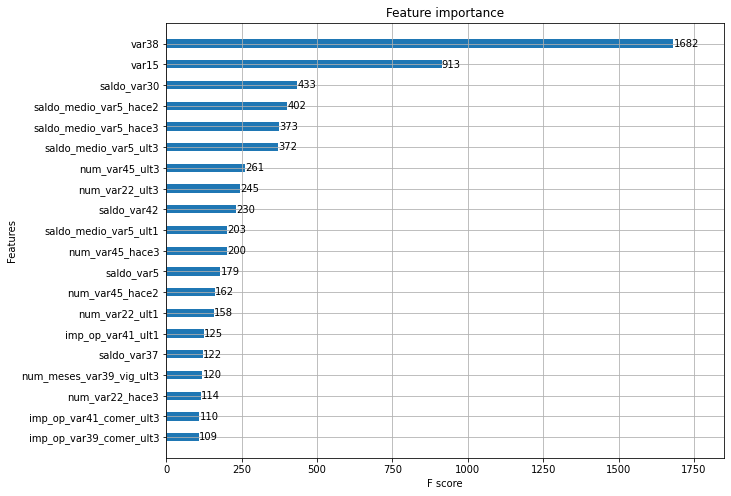

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.823599	training's binary_logloss: 0.155161	valid_1's auc: 0.813415	valid_1's binary_logloss: 0.165141
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.827476	training's binary_logloss: 0.149687	valid_1's auc: 0.819948	valid_1's binary_logloss: 0.160315
[3]	training's auc: 0.836246	training's binary_logloss: 0.14573	valid_1's auc: 0.824787	valid_1's binary_logloss: 0.156955
[4]	training's auc: 0.842429	training's binary_logloss: 0.142639	valid_1's auc: 0.83025	valid_1's binary_logloss: 0.154224
[5]	training's auc: 0.846003	training's binary_logloss: 0.139992	valid_1's auc: 0.834033	valid_1's binary_logloss: 0.151981
[6]	training's auc: 0.849457	training's binary_logloss: 0.13784	valid_1's auc: 0.834504	valid_1's binary_logloss: 0.150068
[7]	training's auc: 0.851892	training's binary_logloss: 0.135931	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.148472
[8]	training's auc: 0.855586	training's binary_logloss: 0.134358	valid_1

In [ ]:
lgbm_search_space = {'num_leaves' : hp.quniform('num_leaves', 32 ,64, 1),
                     'max_depth' : hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples' : hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample' : hp.uniform('subsample', 0.7, 1),
                     'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2)
                     }

In [ ]:
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators=100,
                              num_leaves=int(search_space['num_leaves']),
                              max_depth=int(search_space['max_depth']),
                              min_child_samples=int(search_space['min_child_samples']),
                              subsample=search_space['subsample'],
                              learning_rate=search_space['learning_rate'])

    roc_auc_list = []

    kf = KFold(n_splits=3)
    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)

    return -1*np.mean(roc_auc_list)


In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn=objective_func,
            space=lgbm_search_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials,
            rstate=np.random.seed(0))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[47]	training's auc: 0.917924	training's binary_logloss: 0.110731	valid_1's auc: 0.832276	valid_1's binary_logloss: 0.131716
[48]	training's auc: 0.918716	training's binary_logloss: 0.110344	valid_1's auc: 0.832142	valid_1's binary_logloss: 0.131771
[49]	training's auc: 0.919168	training's binary_logloss: 0.110044	valid_1's auc: 0.831711	valid_1's binary_logloss: 0.131865
[50]	training's auc: 0.919529	training's binary_logloss: 0.109807	valid_1's auc: 0.831566	valid_1's binary_logloss: 0.131907
[51]	training's auc: 0.920279	training's binary_logloss: 0.109449	valid_1's auc: 0.831365	valid_1's binary_logloss: 0.131951
[52]	training's auc: 0.921484	training's binary_logloss: 0.109036	valid_1's auc: 0.831335	valid_1's binary_logloss: 0.131997
[53]	training's auc: 0.921751	training's binary_logloss: 0.108798	valid_1's auc: 0.83132	valid_1's binary_logloss: 0.132035
[54]	training's auc: 0.922471	training's binary_logloss: 0.10842	valid_1's auc: 0.831636	v

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=500,
                          num_leaves=int(best['num_leaves']),
                          max_depth=int(best['max_depth']),
                          min_child_samples=int(best['min_child_samples']),
                          subsample=round(best['subsample'], 5),
                          learning_rate=round(best['learning_rate'], 5)
                          )

lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.824934	training's binary_logloss: 0.158895	valid_1's auc: 0.816253	valid_1's binary_logloss: 0.168384
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.827622	training's binary_logloss: 0.154953	valid_1's auc: 0.820197	valid_1's binary_logloss: 0.164832
[3]	training's auc: 0.829585	training's binary_logloss: 0.151824	valid_1's auc: 0.820402	valid_1's binary_logloss: 0.161887
[4]	training's auc: 0.837313	training's binary_logloss: 0.14921	valid_1's auc: 0.825578	valid_1's binary_logloss: 0.159426
[5]	training's auc: 0.839234	training's binary_logloss: 0.147009	valid_1's auc: 0.827991	valid_1's binary_logloss: 0.15746
[6]	training's auc: 0.844038	training's binary_logloss: 0.145088	valid_1's auc: 0.83144	valid_1's binary_logloss: 0.155677
[7]	training's auc: 0.846649	training's binary_logloss: 0.143353	valid_1's auc: 0.832556	valid_1's binary_logloss: 0.154094
[8]	training's auc: 0.847747	training's binary_logloss: 0.141874	valid_1